In [1]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("asm_full_opt")
from generate_waves import GenerateWaves
from phase_mask import PhaseMask
import config

In [2]:
def plot_phase(phi, X, Y, title):
    """
    Plot phase with +x right, +y up, axes in microns.
    """
    x_um = X[:, 0].detach().cpu().numpy() * 1e6
    y_um = Y[0, :].detach().cpu().numpy() * 1e6

    plt.figure(figsize=(5, 5))
    plt.imshow(
        phi.detach().cpu().numpy().T,
        origin="lower",
        extent=[x_um.min(), x_um.max(), y_um.min(), y_um.max()],
        cmap="twilight"
    )
    plt.colorbar(label="Phase (rad)")
    plt.xlabel("x (µm)")
    plt.ylabel("y (µm)")
    plt.title(title)
    plt.gca().set_aspect("equal")
    plt.tight_layout()
    plt.show()


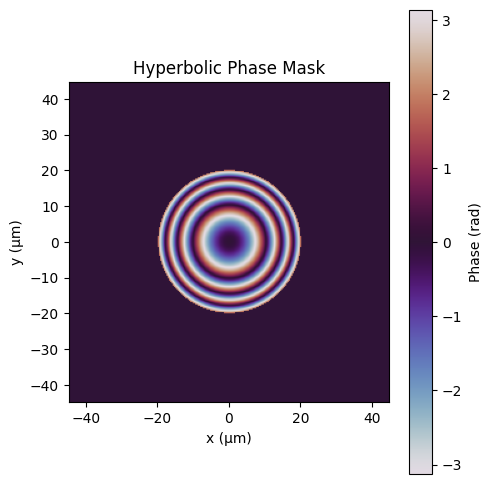

In [3]:
gw = GenerateWaves(config)

phase_hyper = PhaseMask(
    config,
    X=gw.X,
    Y=gw.Y,
    init="hyperbolic",
    wrap_phase=True,
)

phi_hyper = phase_hyper()

plot_phase(phi_hyper, gw.X, gw.Y, "Hyperbolic Phase Mask")

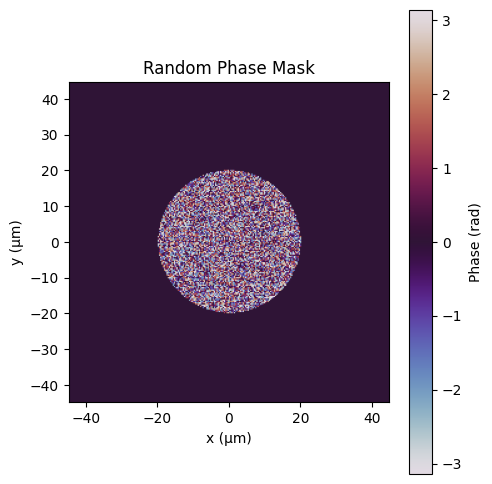

In [4]:
phase_random = PhaseMask(
    config,
    X=gw.X,
    Y=gw.Y,
    init="random",
    wrap_phase=False,
)

phi_random = phase_random()

plot_phase(phi_random, gw.X, gw.Y, "Random Phase Mask")


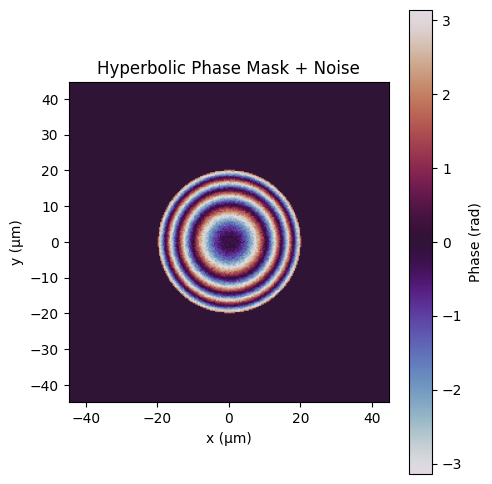

In [5]:
phase_hyper_noise = PhaseMask(
    config,
    X=gw.X,
    Y=gw.Y,
    init="hyperbolic",
    noise_std=0.2,     # try 0.05, 0.1, 0.3
    wrap_phase=True,
)

phi_hyper_noise = phase_hyper_noise()

plot_phase(phi_hyper_noise, gw.X, gw.Y, "Hyperbolic Phase Mask + Noise")
